In [2]:
from IPython.display import HTML

HTML("""
<p style="text-align:center;color:cyan;font-size:44px;font-weight:bolder;padding:0.3em 0 0.5em;border-radius:10px 10px;font-stretch: 125%;margin:0;line-height:115%;">Churn Analysis of Telecom Industry</p>
""")


**The technique of predicting which consumers are most likely to discontinue their connection with a firm or cancel their service subscription within a given timeframe is known as customer churn prediction.**
  Businesses must comprehend client migration in order to recognize the trends, causes, and warning signs of customer attrition. Businesses can create plans to keep current clients, raise customer satisfaction levels, and lower attrition by examining churn behavior and the characteristics that are linked to it. Businesses can take proactive steps to keep at-risk clients by using predictive modeling approaches to anticipate and proactively handle anticipated churn.



The following factors are used in churn prediction:


*   **Churn rate:** The proportion of lost customers over a given time frame.

*   **Time to churn:**The average amount of time that passes between a customer's initial interaction and their churn.

*    **Customer lifetime value (CLV):** The approximate amount of money a client brings in for the business during their tenure.










In [3]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
# Reading data
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## **EDA**

In [6]:
# Drop the useless entity
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Monthly Charges have a datatype of float, but Total Charges have a datatype of object, so we must set the datatype of Monthly Charges to float as well.


In [7]:
# Converted the data type of Total Charges column as float and filled into a dataframe
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Notice here that there are null values in most of the columns. Following is an example that column 488 having no vlaue in Total Charges column

In [8]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
df.iloc[488]['TotalCharges']

' '

These are not making any sense in our data set so we have to remve them from the data set.

In [10]:
# Shape of data before removal
df.shape

(7043, 20)

In [11]:
# Removing the columns which having null values
df1=df[df.TotalCharges !=' ']

In [12]:
# Shape of data after removal
df1.shape

(7032, 20)

We can see there were total 11 columns with null values

In [13]:
# Checking datatypes
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
print(df.TotalCharges.values)
print(df.MonthlyCharges.values)

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
[ 29.85  56.95  53.85 ...  29.6   74.4  105.65]


Our datatype for TotalCharges column is still object but all blank values are gone.

In [15]:
# Now convert TotalCharges column into float and save it in same column
df1['TotalCharges']=pd.to_numeric(df1.TotalCharges)

<ipython-input-15-6560dc4414f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']=pd.to_numeric(df1.TotalCharges)


In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now our column is ready for use. I want to make some visualizations.

 Here tenure refers to the length of time a customer has been subscribed to a service or plan. It's a crucial factor in predicting and understanding customer churn.

In [17]:
# Customers are not leaving
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [18]:
# Customers are leaving
df1[df1.Churn=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [19]:
# Checking the not leaving Customers with tenure and storing in new variable
tenure_No=df1[df1.Churn=='No'].tenure

In [20]:
# Checking the leaving Customers with tenure and storing in new variable
tenure_Yes=df1[df1.Churn=='Yes'].tenure

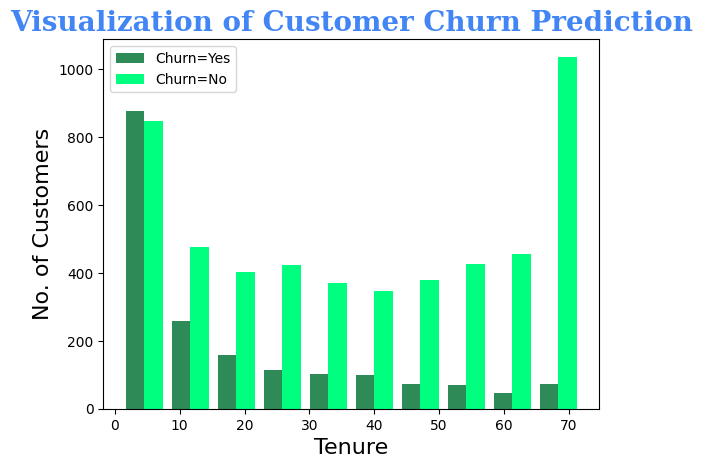

In [21]:
plt.xlabel("Tenure",fontsize=16)
plt.ylabel("No. of Customers",fontsize=16)
plt.hist([tenure_Yes, tenure_No], color=['seagreen', 'springgreen'], label=['Churn=Yes', 'Churn=No'])
plt.title("Visualization of Customer Churn Prediction",fontsize=20, fontweight='bold', fontfamily='serif',color='#4285F4')
plt.legend()
plt.show()

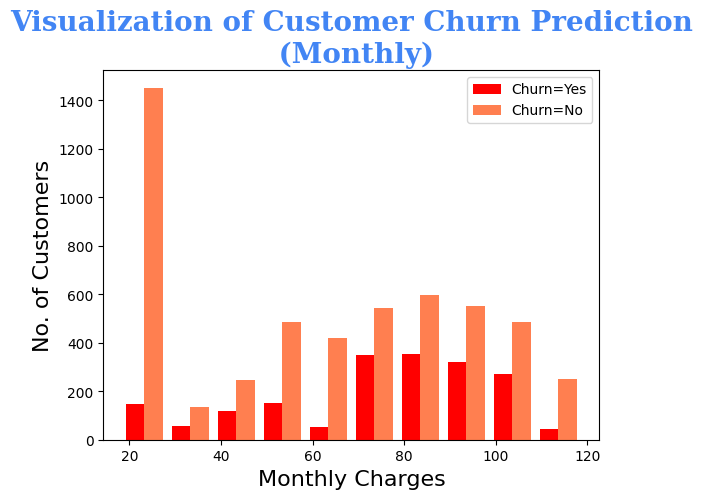

In [22]:
MC_No=df1[df1.Churn=='No'].MonthlyCharges
MC_Yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges",fontsize=16)
plt.ylabel("No. of Customers",fontsize=16)
plt.hist([MC_Yes, MC_No], color=['r', 'coral'], label=['Churn=Yes', 'Churn=No'])
plt.title("Visualization of Customer Churn Prediction\n (Monthly)",fontsize=20, fontweight='bold', fontfamily='serif',color='#4285F4')
plt.legend()
plt.show()

### Data Cleaning

Now we need to deal with values , so checking all the null values in each column

In [23]:
for column in df :
  print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [24]:
for column in df :
  print(df[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [25]:
# Columns with their unique values
for column in df :
  print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

Here i'm seeing that there are so many object values which will can't be helpful for our analysis. So we should make them numeric.

In [26]:
# Printing all the columns with their unique values
def unique_col_vals(df):
  for column in df :
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [27]:
unique_col_vals(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Above there are various columns with redundunt values.



In [28]:
# Making column simple
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

<ipython-input-28-2d10b7644ce5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
<ipython-input-28-2d10b7644ce5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [29]:
unique_col_vals(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Seprating out
yes no columns to make them 1 & 0

In [30]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection' ,'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [31]:
for col in yes_no_cols:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-31-090b5d931a9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [32]:
# Printing all the columns with their unique values
for col in df1:
  print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [33]:
# gender can also be taken as 1 & 0
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-33-60e154d307e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


Now columns InternetService , Contract  & PaymentMethod having more than two text data. to convert them into numeric manually will not be easy . Here we need to apply some preprocessing techniques . Pandas have get_dummies function which creates dummy variables for categorical variable.

```
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
```



In [34]:
# Applied get_dummies and save in new dataframe
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [35]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

After observation conclusion arrises that all the values are in range of 1 & 0, column TotalCharges & MonthlyCharges having wide range values. So we must scale them into 1 & 0.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In Pandas there is a preprocessing technique called MinMaxScaler. It rescales the value of numerical feature to be between two values 1 & 0.

In [37]:
scalar=MinMaxScaler()
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
df2[cols_to_scale]=scalar.fit_transform(df2[cols_to_scale])

In [38]:
for col in df1:
  print(f'{col} : {df1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [39]:
# Seprating out the features
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [40]:
# Splitting the train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [41]:
# Checking the shapes
print(x.shape,x_test.shape,x_train.shape)

(7032, 26) (1407, 26) (5625, 26)


## Train models

In [44]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()
model5 = GaussianNB()

param_grid_lr = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]}
param_grid_nb = {}

models = [model1, model2, model3, model4, model5]
param_grids = [param_grid_lr, param_grid_dt, param_grid_rf, param_grid_gb, param_grid_nb]

In [45]:
best_models = []
metrics = []

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grids[i], cv=5)
    grid_search.fit(x_train, y_train.values.ravel())
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    metrics.append({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

    print(f"Metrics for Model {i+1}:")
    for metric_name in metric_names:
        print(f"{metric_name}: {metrics[-1][metric_name]}")
    print()

Metrics for Model 1:
Accuracy: 0.7960199004975125
Precision: 0.6795252225519288
Recall: 0.5612745098039216
F1: 0.6147651006711409

Metrics for Model 2:
Accuracy: 0.7818052594171997
Precision: 0.6472303206997084
Recall: 0.5441176470588235
F1: 0.5912117177097204

Metrics for Model 3:
Accuracy: 0.7860696517412935
Precision: 0.6777408637873754
Recall: 0.5
F1: 0.5754583921015515

Metrics for Model 4:
Accuracy: 0.7917555081734187
Precision: 0.6837060702875399
Recall: 0.5245098039215687
F1: 0.5936199722607489

Metrics for Model 5:
Accuracy: 0.7491115849324804
Precision: 0.5460636515912898
Recall: 0.7990196078431373
F1: 0.6487562189054726



In [46]:
# Created a dataframe of models and indexed
metrics_df=pd.DataFrame(metrics,index=[f"Model {i+1}" for i in range(len(metrics))])

In [53]:
metrics_df

,Accuracy,Precision,Recall,F1
Model 1,0.796020,0.679525,0.561275,0.614765
Model 2,0.781805,0.647230,0.544118,0.591212
Model 3,0.786070,0.677741,0.500000,0.575458
Model 4,0.791756,0.683706,0.524510,0.593620
Model 5,0.749112,0.546064,0.799020,0.648756


<Figure size 1200x600 with 0 Axes>

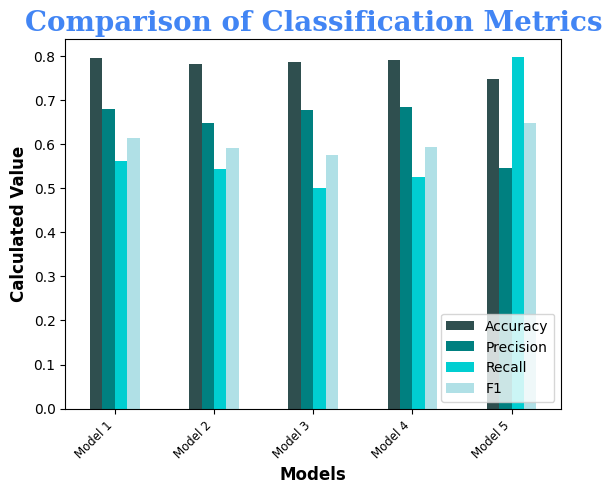

In [48]:
plt.figure(figsize=(12, 6))
colors=['darkslategrey','teal','darkturquoise','powderblue']
metrics_df.plot(kind='bar',color=colors)
plt.xlabel('Models',fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right',fontsize=8.5)
plt.ylabel('Calculated Value',fontsize=12, fontweight='bold')
plt.title('Comparison of Classification Metrics',fontsize=20, fontweight='bold', fontfamily='serif',color='#4285F4')
plt.legend(loc='lower right')
plt.show()

[[728 271]
 [ 82 326]]

Ordinal sequences as TN,FP,FN,TP:


(728, 271, 82, 326)

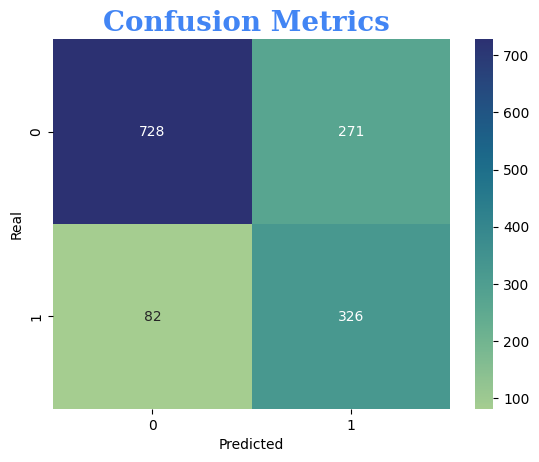

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test,pred)
print(cm)

sns.heatmap(data=cm, annot=True, fmt='d',cmap='crest')
plt.title('Confusion Metrics ',fontsize=20, fontweight='bold', fontfamily='serif',color='#4285F4')
plt.xlabel('Predicted')
plt.ylabel('Real')
print('\nOrdinal sequences as TN,FP,FN,TP:')
tn,fp,fn,tp=np.ravel(cm)
tn,fp,fn,tp

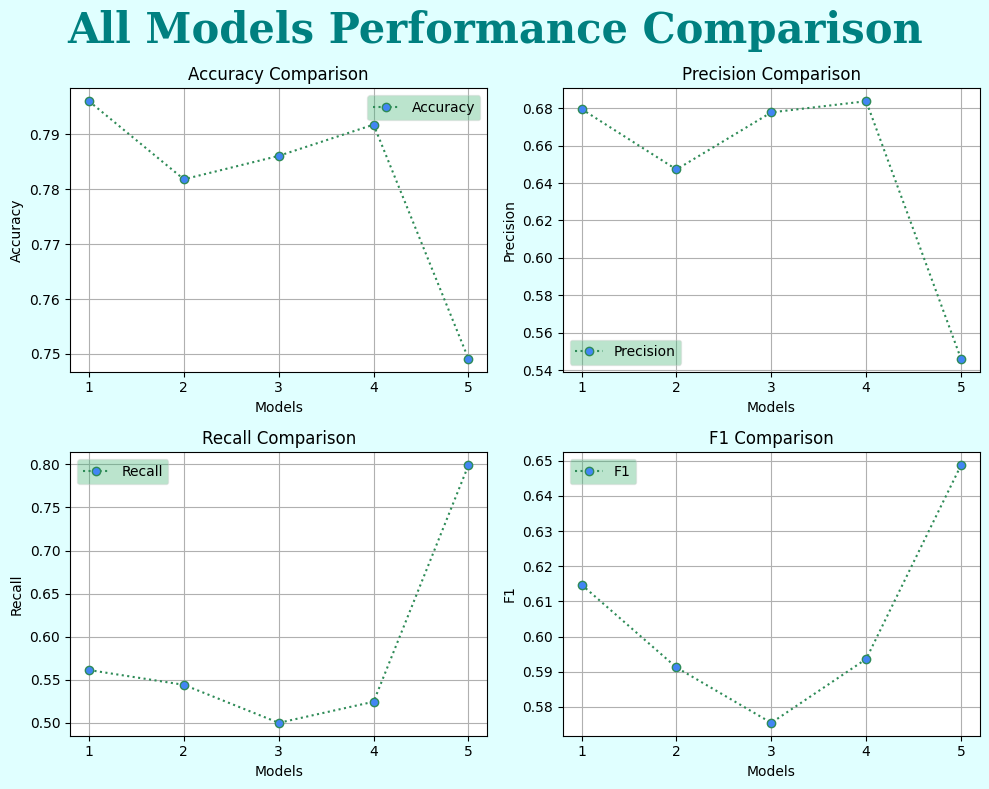

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8),edgecolor='r')
fig.set_facecolor('lightcyan')
fig.suptitle("All Models Performance Comparison", fontsize=30, color='teal', fontweight='bold', fontfamily='serif')
for i, metric_name in enumerate(metric_names):
    ax = axes.flat[i]
    metric_values = [model[metric_name] for model in metrics]
    models_range = range(1, len(metrics) + 1)
    ax.plot(models_range, metric_values,color='seagreen',marker='o',linestyle=':',markerfacecolor='#4285F4' ,label=metric_name)
    ax.set_xlabel('Models',color='black')
    ax.set_ylabel(metric_name,color='black')
    ax.set_title(f"{metric_name} Comparison")
    ax.set_xticks(models_range)
    ax.grid(True)
    ax.legend(facecolor='mediumseagreen', framealpha=0.35)
plt.tight_layout()
plt.show()


In [51]:
matrix=classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       999
           1       0.55      0.80      0.65       408

    accuracy                           0.75      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.75      0.76      1407

